In [162]:
import requests
import pandas as pd
import json
from datetime import datetime
import matplotlib.pyplot as plt

data = []

In [163]:
# Get the stock information
ticker = input("What is the stock ticker for the stock that you want information from? ")
ticker

What is the stock ticker for the stock that you want information from? TSLA


'TSLA'

In [164]:
# Basic varibales for both API calls

header_var  = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}

querystring = {"symbols": ticker}

In [165]:
#Check if Stock Exists
stock_price_url = 'https://query1.finance.yahoo.com/v7/finance/quote'

response = requests.request("GET",stock_price_url,headers=header_var,params=querystring)

stock_json = response.json()

stock_json

if response.status_code == 200:
    print("API call successful")
else:
    print('API call unsuccessful')

if stock_json['quoteResponse']['result']:
    print("Stock Exists")
else:
    print("Stock does not exist")

API call successful
Stock Exists


In [166]:
# Ticker, Long name, current price API call

stock_price_url = 'https://query1.finance.yahoo.com/v7/finance/quote'

response = requests.request("GET",stock_price_url,headers=header_var,params=querystring)

stock_json = response.json()

In [167]:
# Target Mean Price, Cash, and Profit Margin API call

balance_sheet_url = 'https://query1.finance.yahoo.com/v10/finance/quoteSummary/'+ticker+'?modules=financialData'

response1 = requests.request("GET",balance_sheet_url,headers=header_var,params=querystring)

balance_json = response1.json()

In [168]:
# Return Ticker, Full Name, Current Price, Target Mean Price, Cash, Profit Margin
print("Ticker: ", stock_json['quoteResponse']['result'][0]['symbol'])
print("Full name: ", stock_json['quoteResponse']['result'][0]['longName'])
print("Current Price: $", stock_json['quoteResponse']['result'][0]['regularMarketOpen'])
print("Target Mean Price: $"+ balance_json['quoteSummary']['result'][0]['financialData']['targetMeanPrice']['fmt'])
print("Cash on Hand: $"+ balance_json["quoteSummary"]['result'][0]['financialData']['totalCash']['fmt'])
print("Profit Margin: ", balance_json["quoteSummary"]['result'][0]['financialData']['profitMargins']['fmt'])

# Variables for inputting into Dataframe
stock_ticker = stock_json['quoteResponse']['result'][0]['symbol']
stock_full_name = stock_json['quoteResponse']['result'][0]['longName']
stock_current_price = stock_json['quoteResponse']['result'][0]['regularMarketOpen']
stock_target_mean_price = balance_json['quoteSummary']['result'][0]['financialData']['targetMeanPrice']['fmt']
stock_cash = balance_json["quoteSummary"]['result'][0]['financialData']['totalCash']['fmt']
stock_profit_margin = balance_json["quoteSummary"]['result'][0]['financialData']['profitMargins']['fmt']

Ticker:  TSLA
Full name:  Tesla, Inc.
Current Price: $ 224.01
Target Mean Price: $294.78
Cash on Hand: $18.92B
Profit Margin:  14.17%


In [169]:
# Write Information in JSON format from a dataframe
today = datetime.today()
current_date = today.strftime("%m/%d/%y")

data.append([current_date, stock_ticker, stock_full_name, stock_current_price, stock_target_mean_price, stock_cash, stock_profit_margin])
columns = ['Date', 'Ticker', 'Full Name', 'Current Price', 'Target Mean Price', 'Cash on Hand', 'Profit Margin']

input_track = pd.DataFrame(data, columns=columns)

json_format = input_track.to_json(orient = 'records')
json_format

'[{"Date":"10\\/16\\/22","Ticker":"TSLA","Full Name":"Tesla, Inc.","Current Price":224.01,"Target Mean Price":"294.78","Cash on Hand":"18.92B","Profit Margin":"14.17%"}]'

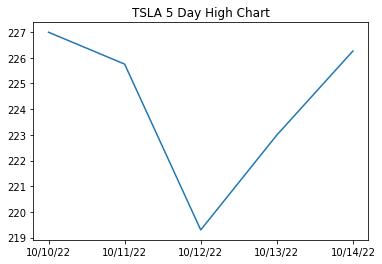

In [170]:
#Matplotlib chart
stock_chart_url = 'https://query1.finance.yahoo.com/v8/finance/chart/'+ticker+'?metrics=high?&interval=1d&range=5d'

response3 = requests.request("GET",stock_chart_url,headers=header_var,params=querystring)

chart_json = response3.json()


price_day1 = chart_json['chart']['result'][0]['indicators']['quote'][0]['high'][0]
price_day2 = chart_json['chart']['result'][0]['indicators']['quote'][0]['high'][1]
price_day3 = chart_json['chart']['result'][0]['indicators']['quote'][0]['high'][2]
price_day4 = chart_json['chart']['result'][0]['indicators']['quote'][0]['high'][3]
price_day5 = chart_json['chart']['result'][0]['indicators']['quote'][0]['high'][4]

prices = [price_day1,price_day2,price_day3,price_day4,price_day5]

date_day1 = datetime.fromtimestamp(chart_json['chart']['result'][0]['timestamp'][0]).strftime('%m/%d/%y')
date_day2 = datetime.fromtimestamp(chart_json['chart']['result'][0]['timestamp'][1]).strftime('%m/%d/%y')
date_day3 = datetime.fromtimestamp(chart_json['chart']['result'][0]['timestamp'][2]).strftime('%m/%d/%y')
date_day4 = datetime.fromtimestamp(chart_json['chart']['result'][0]['timestamp'][3]).strftime('%m/%d/%y')
date_day5 = datetime.fromtimestamp(chart_json['chart']['result'][0]['timestamp'][4]).strftime('%m/%d/%y')

dates = [date_day1, date_day2, date_day3, date_day4, date_day5]

plt.title(ticker+" 5 Day High Chart")
plt.plot(dates,prices)